In [1]:
import sys
import time

from pullnet import PullNet
from pullnet_data_loader import DataLoader
from fpnet_data_loader import FpNetDataLoader
from fpnet import FactsPullNet
from util import *


import warnings
warnings.filterwarnings("ignore")

/home/hxssg1124/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/hxssg1124/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/hxssg1124/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/hxssg1124/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will b

In [2]:
cfg = get_config('config/metaqa3.yml')

In [3]:
facts = load_fact2(cfg['fact_data'])
word2id = load_dict(cfg['data_folder'] + cfg['word2id'])
relation2id = load_dict(cfg['data_folder'] + cfg['relation2id'])
entity2id = load_dict(cfg['data_folder'] + cfg['entity2id'])
id2entity = {idx: entity for entity, idx in entity2id.items()}

In [4]:
train_data = FpNetDataLoader(cfg['data_folder'] + cfg['train_data'], facts, entity2id, word2id, relation2id, cfg['max_query_word'], cfg['use_inverse_relation'], teacher_force=True)

loading data from datasets/metaqa/3hop/train.json
  3%|▎         | 3263/107377 [00:00<00:03, 32620.15it/s]building word index ...
preparing data ...
converting global to local entity index ...
  0%|          | 468/107377 [00:00<00:22, 4671.76it/s]avg local entity:  102.56289521964666
max_local_entity 221
preparing data ...
100%|██████████| 107377/107377 [00:22<00:00, 4685.07it/s]


0.024716652541978263
0.05423019822780792


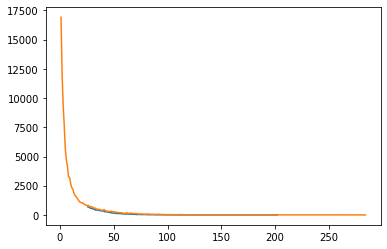

In [26]:
from collections import defaultdict
import matplotlib.pyplot as plt
ls = defaultdict(int)
hop2 = defaultdict(int)
hop3 = defaultdict(int)
hops = defaultdict(int)
for e in train_data.data:
    hops[len(e['path'])] += 1
for e in train_data.data:
    for i, p in enumerate(e['path']):
        ls[i] += len(e['path'][p])
    hop2[len(e['path']['2'])] += 1
    if '3' in e['path']:
        hop3[len(e['path']['3'])] += 1
for k in ls:
    ls[k] /= len(train_data.data)
total_2hop = np.sum(list(hop2.values()))
total_3hop = np.sum(list(hop3.values()))
x = list(sorted(list(hop2.keys())))
y = [hop2[e] for e in x]
x2 = list(sorted(list(hop3.keys())))
y2 = [hop3[e] for e in x2]
total2 = np.sum(y[50:])
total3 = np.sum(y2[50:])
#plt.plot(x[25:], y[25:])
print(total2 / total_2hop)
print(total3 / total_3hop)
plt.plot(x2, y2)

In [18]:
print(train_data.data[0]['path'])

{'0': ['Dil Chahta Hai'], '1': ['Aamir Khan', 'Saif Ali Khan', '2001', 'Farhan Akhtar', 'Preity Zinta'], '2': ['Ishq', 'Koi... Mil Gaya', 'Don', 'Ghajini', 'Luck by Chance', 'Veer-Zaara', 'Karthik Calling Karthik', 'Dil Se..', 'PK', 'Agent Vinod', 'Salaam Namaste'], '3': ['2003', '2008', '2010', '2006', '2012', '1998', '2004', '2009', '2014', '2005', '1997']}
